In this notebook, I want to apply different **linear regression** algorithms from **scikit-learn** library:

* Ridge
* Lasso
* Polynomial regression.

If you find it useful, it is credited to "Applied Machine Learning in Python" course designed by University of Michigan.

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 150
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


print('X_train shape: {}'
     .format(X_train.shape))
print('y_train shape: {}'
     .format(y_train.shape))

print('X_test shape: {}'
     .format(X_test.shape))
print('y_test shape: {}'
     .format(y_test.shape))

X_train shape: (112,)
y_train shape: (112,)
X_test shape: (38,)
y_test shape: (38,)


<IPython.core.display.Javascript object>


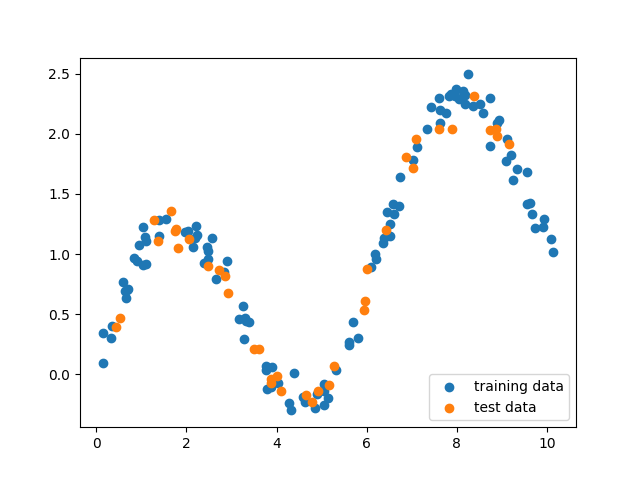

In [52]:
# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
       
part1_scatter()

In [53]:
# we have to reshape the data as follows
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [54]:
print('X_train shape: {}'
     .format(X_train.shape))
print('y_train shape: {}'
     .format(y_train.shape))

print('X_test shape: {}'
     .format(X_test.shape))
print('y_test shape: {}'
     .format(y_test.shape))

X_train shape: (112, 1)
y_train shape: (112, 1)
X_test shape: (38, 1)
y_test shape: (38, 1)


### 1) Ridge

In [67]:
from sklearn import linear_model

linridge = linear_model.Ridge(alpha=20.0)
linridge.fit(X_train, y_train)


print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: [0.34894519]
ridge regression linear model coeff:
[[0.14192028]]
R-squared score (training): 0.308
R-squared score (test): 0.239
Number of non-zero features: 1


### 2) Lasso

In [63]:
from sklearn import linear_model

linlasso = linear_model.Lasso(alpha=.1)

linlasso.fit(X_train,y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))

lasso regression linear model intercept: [0.39115016]
lasso regression linear model coeff:
[0.13373496]
Non-zero features: 1
R-squared score (training): 0.306
R-squared score (test): 0.235



### 3) Polynomial linear regression:

Apply a Polynomial Linear regression model on the training data set for degrees of (1, 3, 6, 9) and predict the values over the interval x=0 to 10. Store the results in a numpy array in which the first row corresponds to the output from the model with degree 1 and so on.

<details>
    
See the following useful links
    
<a href="https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape">reshape(-1,1)</a>
    
<a href="https://book.pythontips.com/en/latest/enumerate.html">enumerate</a>

In [69]:
X_test = np.linspace(0,10,100)
print(X_test.shape)

# make X_test as a row vector
X_test = np.linspace(0,10,100).reshape(-1,1)
print(X_test.shape)

y_test = y_test.reshape(-1,1)

# reshape the training set
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
#print(X_train.shape)
#print(y_train.shape)

(100,)
(100, 1)


In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def Poly_prediction():
    answer = np.zeros((4,100))
    degrees = [1, 3, 6, 9]
    for i in range(len(degrees)):
        poly = PolynomialFeatures(degree=degrees[i])
        X_train_poly = poly.fit_transform(X_train)
        #print(X_train_poly.shape)
        LR = LinearRegression().fit(X_train_poly,y_train)
        #print(y_train.shape)
        X_test_poly = poly.fit_transform(X_test)
        y_pred = LR.predict(X_test_poly).reshape(1,-1)
        #print(y_pred.shape)
        answer[i,:] = y_pred
    return answer

Poly_prediction()

array([[ 0.3346184 ,  0.34923444,  0.36385049,  0.37846653,  0.39308258,
         0.40769862,  0.42231467,  0.43693071,  0.45154676,  0.4661628 ,
         0.48077885,  0.49539489,  0.51001094,  0.52462698,  0.53924303,
         0.55385907,  0.56847512,  0.58309117,  0.59770721,  0.61232326,
         0.6269393 ,  0.64155535,  0.65617139,  0.67078744,  0.68540348,
         0.70001953,  0.71463557,  0.72925162,  0.74386766,  0.75848371,
         0.77309975,  0.7877158 ,  0.80233184,  0.81694789,  0.83156393,
         0.84617998,  0.86079603,  0.87541207,  0.89002812,  0.90464416,
         0.91926021,  0.93387625,  0.9484923 ,  0.96310834,  0.97772439,
         0.99234043,  1.00695648,  1.02157252,  1.03618857,  1.05080461,
         1.06542066,  1.0800367 ,  1.09465275,  1.10926879,  1.12388484,
         1.13850089,  1.15311693,  1.16773298,  1.18234902,  1.19696507,
         1.21158111,  1.22619716,  1.2408132 ,  1.25542925,  1.27004529,
         1.28466134,  1.29927738,  1.31389343,  1.3

There is a possibility to use `enumerate`.

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def Poly_prediction():
    answer = np.zeros((4,100))
    degrees = [1, 3, 6, 9]
    for counter, value in enumerate(degrees):
        poly = PolynomialFeatures(degree=value)
        X_train_poly = poly.fit_transform(X_train)
        #print(X_train_poly.shape)
        LR = LinearRegression().fit(X_train_poly,y_train)
        #print(y_train.shape)
        X_test_poly = poly.fit_transform(X_test)
        y_pred = LR.predict(X_test_poly).reshape(1,-1)
        #print(y_pred.shape)
        answer[counter,:] = y_pred
    return answer

Poly_prediction()

array([[ 0.3346184 ,  0.34923444,  0.36385049,  0.37846653,  0.39308258,
         0.40769862,  0.42231467,  0.43693071,  0.45154676,  0.4661628 ,
         0.48077885,  0.49539489,  0.51001094,  0.52462698,  0.53924303,
         0.55385907,  0.56847512,  0.58309117,  0.59770721,  0.61232326,
         0.6269393 ,  0.64155535,  0.65617139,  0.67078744,  0.68540348,
         0.70001953,  0.71463557,  0.72925162,  0.74386766,  0.75848371,
         0.77309975,  0.7877158 ,  0.80233184,  0.81694789,  0.83156393,
         0.84617998,  0.86079603,  0.87541207,  0.89002812,  0.90464416,
         0.91926021,  0.93387625,  0.9484923 ,  0.96310834,  0.97772439,
         0.99234043,  1.00695648,  1.02157252,  1.03618857,  1.05080461,
         1.06542066,  1.0800367 ,  1.09465275,  1.10926879,  1.12388484,
         1.13850089,  1.15311693,  1.16773298,  1.18234902,  1.19696507,
         1.21158111,  1.22619716,  1.2408132 ,  1.25542925,  1.27004529,
         1.28466134,  1.29927738,  1.31389343,  1.3